In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Mean and variance of the two classes
class1_mu = 8
class1_sigma = np.sqrt(20)
class2_mu = 16
class2_sigma = np.sqrt(25)

In [49]:
# 50 random samples from N[5,20]
samples1 = np.random.normal(5,np.sqrt(20),50)
# 50 random samples from N[11,10]
samples2 = np.random.normal(11,np.sqrt(10),50)
# 50 random samples from N[20,8]
samples3 = np.random.normal(20,np.sqrt(8),50)

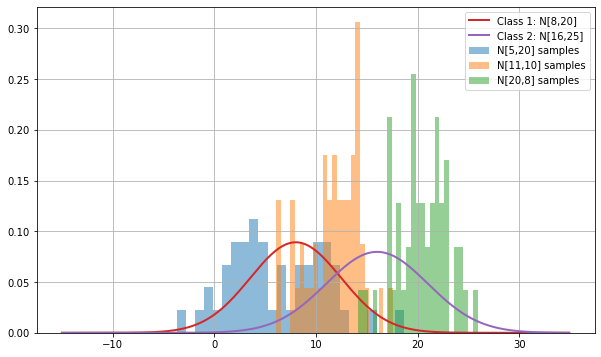

In [50]:
x = np.arange(-15,35,0.1)

plt.figure(figsize=(10, 6))
# histogram for N[5,20]
plt.hist(samples1, bins = 25, density=True, label='N[5,20] samples', alpha=0.5)
# histogram for N[11,10]
plt.hist(samples2, bins = 25, density=True, label='N[11,10] samples', alpha=0.5)
# histogram for N[20,8]
plt.hist(samples3, bins = 25, density=True, label='N[20,8] samples', alpha=0.5)

# PDF of class 1
pdf_class1 = (1/(class1_sigma*(np.sqrt(2*np.pi))))*np.exp(-(x-class1_mu)**2/(2*(class1_sigma**2)))
plt.plot(x, pdf_class1, label = 'Class 1: N[8,20]', linewidth = 2)
# PDF of class 2
pdf_class2 = (1/(class2_sigma*(np.sqrt(2*np.pi))))*np.exp(-(x-class2_mu)**2/(2*(class2_sigma**2)))
plt.plot(x, pdf_class2, label = 'Class 2: N[16,25]', linewidth = 2)

plt.grid()
plt.legend()
plt.show()

In [51]:
# Actual mean and SD for the samples
mu1 = np.mean(samples1)
sigma1 = np.std(samples1)
mu2 = np.mean(samples2)
sigma2 = np.std(samples2)
mu3 = np.mean(samples3)
sigma3 = np.std(samples3)

In [52]:
#classification function
def distribute(P1,P2,mu1,sigma1,mu2,sigma2,samples):
    n = len(samples)
    classes = [0]*n
    for i in range(n):
        sample = samples[i]
        
        p1 = (1/(sigma1*(np.sqrt(2*np.pi))))*np.exp(-(sample-mu1)**2 / (2*(sigma1**2)))
        p2 = (1/(sigma2*(np.sqrt(2*np.pi))))*np.exp(-(sample-mu2)**2 / (2*(sigma2**2)))

        classes[i] = 'b' if p1*P1 > p2*P2 else 'g'
    return classes

In [67]:
# sample dictionary	
samples = {
    0:samples1,
    1:samples2,
    2:samples3
}
# appriory probability dictionary
P = {
    0:[0.5,0.5],
    1:[0.3,0.7],
    2:[0.7,0.3]
}
label = {
    0:"N[5,20]",
    1:"N[11,10]",
    2:"N[20,8]"
}

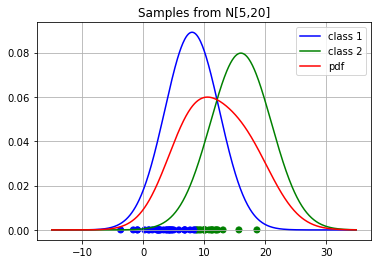

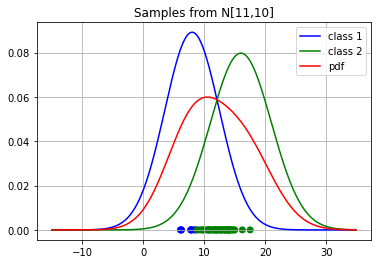

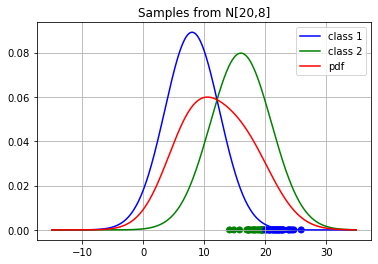

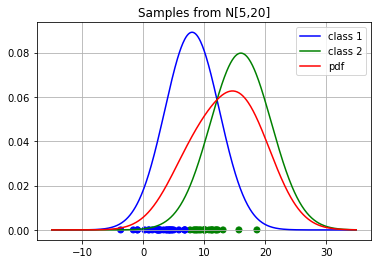

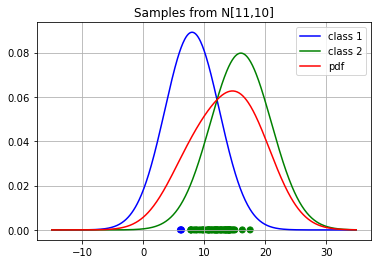

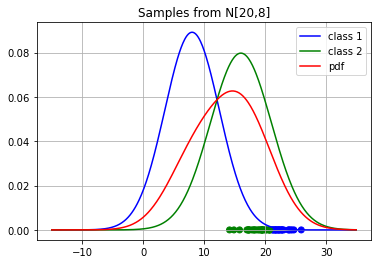

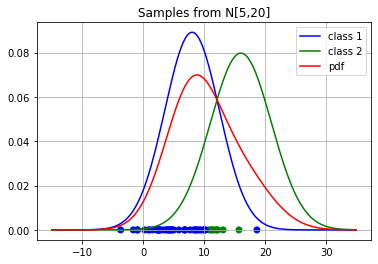

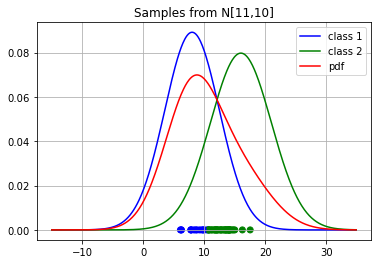

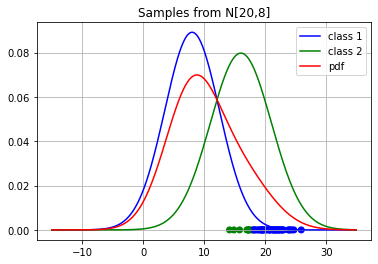

In [68]:
for j in range(3):
    P1 = P[j][0]
    P2 = P[j][1]

    for i in range(3):
		# classify
        classes = distribute(P1,P2,mu1,sigma1,mu2,sigma2,samples[i])

		# plot
        plt.plot(x,pdf_class1,'b-',label = 'class 1')
        plt.plot(x,pdf_class2,'g-',label = 'class 2')

		# merge
        pdf = P1*pdf_class1  + P2*pdf_class2
        plt.plot(x,pdf,'r-',label = 'pdf')

		# plot classification
        plt.scatter(samples[i],np.zeros_like(samples[i]),c = classes)
        plt.title("Samples from " + label[i])
        plt.grid()
        plt.legend()
        plt.show()